## **실습 4. AI 모델링 최적화**
## 본 실습파일은 <u><b>학습자용</u> 입니다.
* 본 과정에서는 웹페이지에서 추출한 Feature(특징) 기반으로 악성사이트를 탐지하는 머신러닝 분류문제를 예제코드를 통해서 해결할 것입니다.
---


In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas seaborn sklearn tensorflow

# (실습준비) 데이터 불러오기부터

* 데이터 프레임 관련 라이브러리

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [ ]:
Train_Data = pd.read_csv('TrainData.csv',delimiter=',')

### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

# 1. 모델 최적화 : Hyperparameter Tuning
* Hyperparmeter는 머신러닝에서 모델을 학습하기 전에 설정해주는 옵션 값이라고 할 수 있습니다.


# 지금부터 모델 최적화를 시작합니다.

---

# <b>RandomForest GridSearchCV
### 만족할만한 하이퍼파리미터 조합을 찾는 단순한 방법은 수동으로 하이퍼파라미터를 조정하면서 찾는 방법입니다.
### GridSearchcv는 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적의 하이퍼파라미터를 탐색해 줍니다.
### 탐색하고자 하는 하이퍼파라미터를 지정하면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 됩니다.


* 주요 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">param_grid</td><td>파라미터 딕셔너리</td>
    </tr>
    <tr>
        <td align="center">scoring</td><td>예측 성능을 측정할 평가 방법</td>
    </tr>
    <tr>
        <td align="center">cv</td><td>교차 검증을 위해 분할되는 폴드 수</td>
    </tr>
</table>

**<span style="color:green">[참고링크] 공식 Document**</span>
 
* GridSearchCV(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* model evaluation(https://scikit-learn.org/stable/modules/model_evaluation.html)

#### [실습문제1] 모델 최적화_1
* 그라디언트 부스팅을 기준으로 모델최적화를 하고 모델을 저장해주세요.
* random_state는 42로 학습시켜주세요.
* 기준 : F1-Score 0.7 이상
* 최적화된 모델은 4_model.pkl로 저장해주세요.(폴더위치는 model입니다.)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = [ {'n_estimators':[30,40,50,60,100], 'max_depth':[30,40,50,60,100]}]

In [15]:
rfc = RandomForestClassifier()

In [16]:
rfc_grid = GridSearchCV(rfc, 
                        param_grid, # 
                        cv=2, 
                        scoring='accuracy', # Classification일때  'accuracy','f1' ...
                                            # Regression 일때 'neg_mean_squared_error','r2'...
                        n_jobs=-1,          
                        verbose=1           # Log 출력 Level 조정
                       )

In [17]:
rfc_grid.fit(train_x, train_y)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [30, 40, 50, 60, 100],
                          'n_estimators': [30, 40, 50, 60, 100]}],
             scoring='accuracy', verbose=1)

In [18]:
rfc_model = rfc_grid.best_estimator_

In [19]:
print('최적의 파라미터 값 : ', rfc_grid.best_params_)
print('최고의 점수 : ', rfc_grid.best_score_)

최적의 파라미터 값 :  {'max_depth': 30, 'n_estimators': 40}
최고의 점수 :  0.9584251101321586


In [20]:
rfc_grid_pred = rfc_model.predict(test_x)

In [21]:
# train 및 val 데이터 정확도
rfc_model.score(train_x, train_y), rfc_model.score(test_x, test_y)

(1.0, 0.9698137443802184)

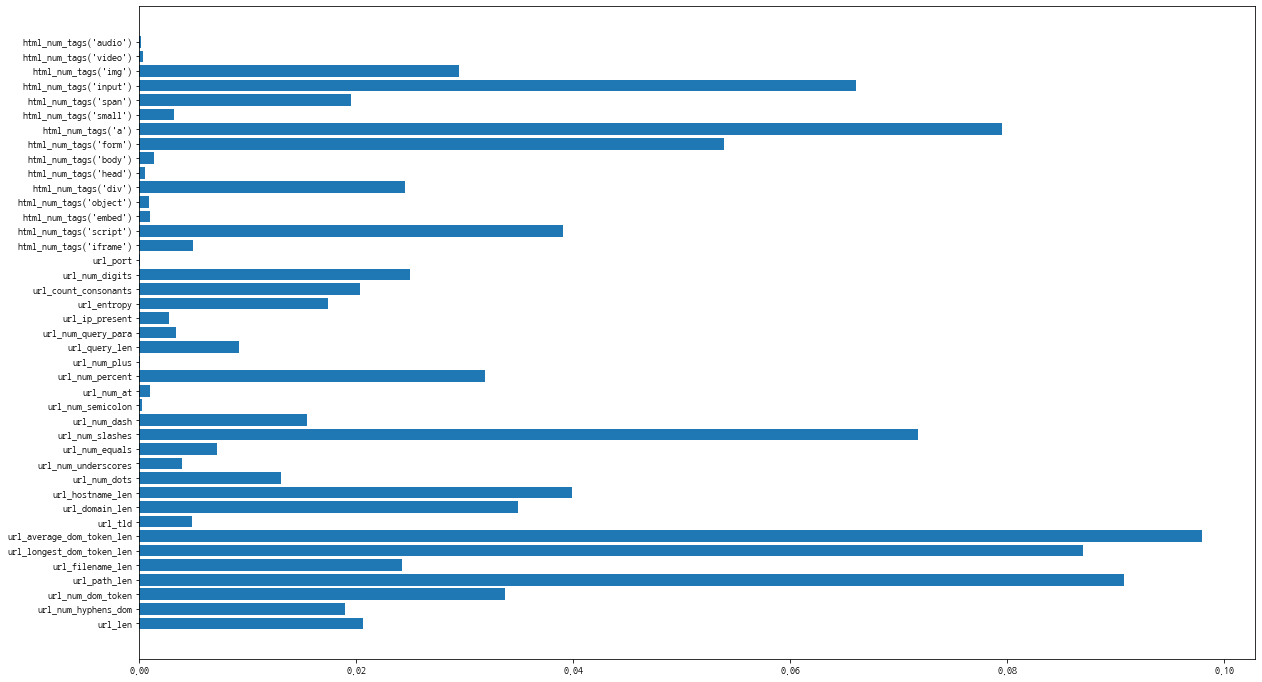

In [23]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=Train_Data.columns[:-1],
        width = rfc_model.feature_importances_)
plt.show()